<a href="https://colab.research.google.com/github/Abhishek54765/assistant/blob/master/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MagicBricks.csv')

In [ ]:
data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [ ]:
data['Bathroom'].value_counts()

2.0    551
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: Bathroom, dtype: int64

In [ ]:
data.loc[:,['Bathroom','Price']].max()

Bathroom            7.0
Price       240000000.0
dtype: float64

In [ ]:
data.loc[:,['Bathroom','Price']].min()

Bathroom          1.0
Price       1000000.0
dtype: float64

In [ ]:
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [ ]:
data= data.dropna()
data.isnull().value_counts()
data.index = np.arange(0,1005)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit( n_splits=1 , test_size=0.2 , random_state=42)  #it is one way of dividing the test and train set by using the scikit learn.
for train_index, test_index in split.split(data, data["Bathroom"]): #it returns the indexes.
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]

In [ ]:
strat_train_set

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
769,800.0,2,2.0,Unfurnished,"Dilshad Colony, Dilshad Garden",1.0,6000000,Ready_to_move,Resale,Builder_Floor,7500.0
122,270.0,2,1.0,Semi-Furnished,Budh Vihar Phase 1,1.0,1400000,Ready_to_move,Resale,Apartment,5185.0
484,2100.0,3,4.0,Semi-Furnished,Saket,2.0,25000000,Ready_to_move,Resale,Builder_Floor,14705.0
882,650.0,2,2.0,Unfurnished,"Panchsheel Vihar, Sheikh Sarai",1.0,3800000,Ready_to_move,Resale,Apartment,15882.0
212,1600.0,3,3.0,Semi-Furnished,New Friends Colony,2.0,40000000,Ready_to_move,Resale,Apartment,15459.0
...,...,...,...,...,...,...,...,...,...,...,...
118,900.0,3,2.0,Semi-Furnished,Budh Vihar,1.0,4000000,Ready_to_move,Resale,Builder_Floor,4444.0
291,504.0,2,1.0,Furnished,"Yamuna Vihar, Shahdara",1.0,2700000,Ready_to_move,Resale,Builder_Floor,5357.0
141,1300.0,4,4.0,Semi-Furnished,Rohini Sector 22,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,5255.0
573,3405.0,5,4.0,Semi-Furnished,"Common Wealth Games Village, Commonwealth Game...",3.0,71500000,Ready_to_move,Resale,Apartment,20999.0


In [ ]:
datacpy = strat_train_set

In [ ]:
cor2 = data.corr()
cor2['Price'].sort_values(ascending = False)

Price       1.000000
Bathroom    0.732241
BHK         0.599587
Area        0.574410
Per_Sqft    0.325240
Parking     0.035894
Name: Price, dtype: float64

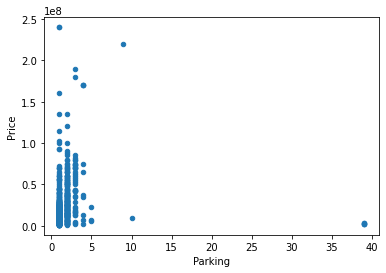

In [ ]:
datacpy.plot(kind='scatter',x='Parking', y= 'Price')

In [ ]:
datacpy['Bathroom_per_BHK'] = datacpy['Bathroom']/datacpy['BHK']
datacpy['Parking_per_BHK'] = datacpy['Parking']/datacpy['BHK']
datacpy['BHK_per_Area'] = datacpy['BHK']/datacpy['Area']
datacpy

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Bathroom_per_BHK,Parking_per_BHK,BHK_per_Area
769,800.0,2,2.0,Unfurnished,"Dilshad Colony, Dilshad Garden",1.0,6000000,Ready_to_move,Resale,Builder_Floor,7500.0,1.000000,0.500000,0.002500
122,270.0,2,1.0,Semi-Furnished,Budh Vihar Phase 1,1.0,1400000,Ready_to_move,Resale,Apartment,5185.0,0.500000,0.500000,0.007407
484,2100.0,3,4.0,Semi-Furnished,Saket,2.0,25000000,Ready_to_move,Resale,Builder_Floor,14705.0,1.333333,0.666667,0.001429
882,650.0,2,2.0,Unfurnished,"Panchsheel Vihar, Sheikh Sarai",1.0,3800000,Ready_to_move,Resale,Apartment,15882.0,1.000000,0.500000,0.003077
212,1600.0,3,3.0,Semi-Furnished,New Friends Colony,2.0,40000000,Ready_to_move,Resale,Apartment,15459.0,1.000000,0.666667,0.001875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,900.0,3,2.0,Semi-Furnished,Budh Vihar,1.0,4000000,Ready_to_move,Resale,Builder_Floor,4444.0,0.666667,0.333333,0.003333
291,504.0,2,1.0,Furnished,"Yamuna Vihar, Shahdara",1.0,2700000,Ready_to_move,Resale,Builder_Floor,5357.0,0.500000,0.500000,0.003968
141,1300.0,4,4.0,Semi-Furnished,Rohini Sector 22,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,5255.0,1.000000,0.250000,0.003077
573,3405.0,5,4.0,Semi-Furnished,"Common Wealth Games Village, Commonwealth Game...",3.0,71500000,Ready_to_move,Resale,Apartment,20999.0,0.800000,0.600000,0.001468


In [ ]:
cor2 = datacpy.corr()
cor2['Price'].sort_values(ascending= False)

Price               1.000000
Bathroom            0.718687
Area                0.599028
BHK                 0.582759
Per_Sqft            0.329223
Bathroom_per_BHK    0.301046
Parking             0.051831
Parking_per_BHK    -0.061273
BHK_per_Area       -0.150610
Name: Price, dtype: float64

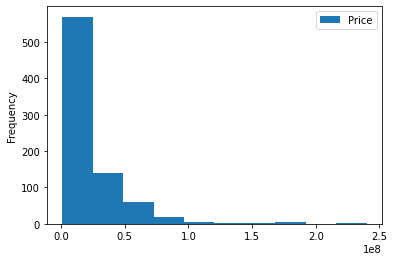

In [ ]:
datacpy.plot(kind ='hist', x ='BHK_per_Area', y = 'Price')

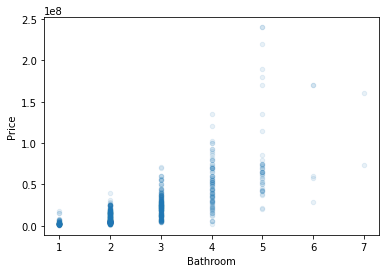

In [ ]:
datacpy.plot(kind ='scatter', x ='Bathroom', y = 'Price', alpha=.1)

In [ ]:
datacpy['Transaction'].value_counts()

Resale          478
New_Property    326
Name: Transaction, dtype: int64

In [ ]:
datacpy['Status'].value_counts()

Ready_to_move    752
Almost_ready      52
Name: Status, dtype: int64

In [ ]:
datacpy['Type'].value_counts()

Builder_Floor    438
Apartment        366
Name: Type, dtype: int64

In [ ]:
datacpy['Furnishing'].value_counts()

Semi-Furnished    441
Unfurnished       246
Furnished         117
Name: Furnishing, dtype: int64

In [ ]:
datacpy['Locality'].value_counts()

J R Designers Floors, Rohini Sector 24                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       27
Kailash Colony, Greater Kailash                                                                                                                                                                                                                                                         

In [ ]:
datacpy = strat_train_set.drop('Price', axis=1)
datacpy

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft,Bathroom_per_BHK,Parking_per_BHK,BHK_per_Area
769,800.0,2,2.0,Unfurnished,"Dilshad Colony, Dilshad Garden",1.0,Ready_to_move,Resale,Builder_Floor,7500.0,1.000000,0.500000,0.002500
122,270.0,2,1.0,Semi-Furnished,Budh Vihar Phase 1,1.0,Ready_to_move,Resale,Apartment,5185.0,0.500000,0.500000,0.007407
484,2100.0,3,4.0,Semi-Furnished,Saket,2.0,Ready_to_move,Resale,Builder_Floor,14705.0,1.333333,0.666667,0.001429
882,650.0,2,2.0,Unfurnished,"Panchsheel Vihar, Sheikh Sarai",1.0,Ready_to_move,Resale,Apartment,15882.0,1.000000,0.500000,0.003077
212,1600.0,3,3.0,Semi-Furnished,New Friends Colony,2.0,Ready_to_move,Resale,Apartment,15459.0,1.000000,0.666667,0.001875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,900.0,3,2.0,Semi-Furnished,Budh Vihar,1.0,Ready_to_move,Resale,Builder_Floor,4444.0,0.666667,0.333333,0.003333
291,504.0,2,1.0,Furnished,"Yamuna Vihar, Shahdara",1.0,Ready_to_move,Resale,Builder_Floor,5357.0,0.500000,0.500000,0.003968
141,1300.0,4,4.0,Semi-Furnished,Rohini Sector 22,1.0,Ready_to_move,New_Property,Builder_Floor,5255.0,1.000000,0.250000,0.003077
573,3405.0,5,4.0,Semi-Furnished,"Common Wealth Games Village, Commonwealth Game...",3.0,Ready_to_move,Resale,Apartment,20999.0,0.800000,0.600000,0.001468


In [ ]:
datacpy_labels = strat_train_set['Price'].copy()
datacpy_labels

769     6000000
122     1400000
484    25000000
882     3800000
212    40000000
         ...   
118     4000000
291     2700000
141    15000000
573    71500000
29     13000000
Name: Price, Length: 804, dtype: int64

In [ ]:
drop_columns = ['BHK','Bathroom_per_BHK','Locality','Parking']
datacpy = datacpy.drop(drop_columns, axis=1)
datacpy

,Area,Bathroom,Furnishing,Status,Transaction,Type,Per_Sqft,Parking_per_BHK,BHK_per_Area
769,800.0,2.0,Unfurnished,Ready_to_move,Resale,Builder_Floor,7500.0,0.500000,0.002500
122,270.0,1.0,Semi-Furnished,Ready_to_move,Resale,Apartment,5185.0,0.500000,0.007407
484,2100.0,4.0,Semi-Furnished,Ready_to_move,Resale,Builder_Floor,14705.0,0.666667,0.001429
882,650.0,2.0,Unfurnished,Ready_to_move,Resale,Apartment,15882.0,0.500000,0.003077
212,1600.0,3.0,Semi-Furnished,Ready_to_move,Resale,Apartment,15459.0,0.666667,0.001875
...,...,...,...,...,...,...,...,...,...
118,900.0,2.0,Semi-Furnished,Ready_to_move,Resale,Builder_Floor,4444.0,0.333333,0.003333
291,504.0,1.0,Furnished,Ready_to_move,Resale,Builder_Floor,5357.0,0.500000,0.003968
141,1300.0,4.0,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor,5255.0,0.250000,0.003077
573,3405.0,4.0,Semi-Furnished,Ready_to_move,Resale,Apartment,20999.0,0.600000,0.001468


In [ ]:
catagorical = ['Type','Transaction','Status','Furnishing']
datacpy_num= datacpy.drop(catagorical, axis=1)
datacpy_num

,Area,Bathroom,Per_Sqft,Parking_per_BHK,BHK_per_Area
769,800.0,2.0,7500.0,0.500000,0.002500
122,270.0,1.0,5185.0,0.500000,0.007407
484,2100.0,4.0,14705.0,0.666667,0.001429
882,650.0,2.0,15882.0,0.500000,0.003077
212,1600.0,3.0,15459.0,0.666667,0.001875
...,...,...,...,...,...
118,900.0,2.0,4444.0,0.333333,0.003333
291,504.0,1.0,5357.0,0.500000,0.003968
141,1300.0,4.0,5255.0,0.250000,0.003077
573,3405.0,4.0,20999.0,0.600000,0.001468


In [ ]:
datacpy_cat = datacpy[catagorical]
datacpy_cat

,Type,Transaction,Status,Furnishing
769,Builder_Floor,Resale,Ready_to_move,Unfurnished
122,Apartment,Resale,Ready_to_move,Semi-Furnished
484,Builder_Floor,Resale,Ready_to_move,Semi-Furnished
882,Apartment,Resale,Ready_to_move,Unfurnished
212,Apartment,Resale,Ready_to_move,Semi-Furnished
...,...,...,...,...
118,Builder_Floor,Resale,Ready_to_move,Semi-Furnished
291,Builder_Floor,Resale,Ready_to_move,Furnished
141,Builder_Floor,New_Property,Ready_to_move,Semi-Furnished
573,Apartment,Resale,Ready_to_move,Semi-Furnished


In [ ]:
#from sklearn.preprocessing import OneHotEncoder #it will turn the categorical data into a specific format of 0 and 1. see the format carefully.
#cat_encoder = OneHotEncoder()
#non_numeric_hot = cat_encoder.fit_transform(datacpy_cat)
#non_numeric_hot
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
datacpy_cat_encoded = ordinal_encoder.fit_transform(datacpy_cat)
datacpy_cat_encoded[:10]

array([[1., 1., 1., 2.],
       [0., 1., 1., 1.],
       [1., 1., 1., 1.],
       [0., 1., 1., 2.],
       [0., 1., 1., 1.],
       [1., 0., 1., 2.],
       [0., 1., 1., 1.],
       [1., 1., 1., 0.],
       [0., 1., 1., 2.],
       [1., 0., 0., 2.]])

In [ ]:
#non_numeric_hot.toarray()

In [ ]:
#cat_encoder.categories_

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('std_scaler', StandardScaler()),]) 
datacpy_num_tr = num_pipeline.fit_transform(datacpy_num)
datacpy_num_tr


array([[-0.41724406, -0.52904201, -0.39222343, -0.09578182, -0.12015535],
       [-0.75025342, -1.44971252, -0.51230393, -0.09578182,  0.59064838],
       [ 0.39957137,  1.31229901, -0.01849556, -0.04094635, -0.27534431],
       ...,
       [-0.10308428,  1.31229901, -0.50867299, -0.17803503, -0.03659207],
       [ 1.2195284 ,  1.31229901,  0.30797817, -0.06288054, -0.26957125],
       [-0.3544121 , -0.52904201, -0.03203379,  0.06872459, -0.16038952]])

In [ ]:
datacpy

,Area,Bathroom,Furnishing,Status,Transaction,Type,Per_Sqft,Parking_per_BHK,BHK_per_Area
769,800.0,2.0,Unfurnished,Ready_to_move,Resale,Builder_Floor,7500.0,0.500000,0.002500
122,270.0,1.0,Semi-Furnished,Ready_to_move,Resale,Apartment,5185.0,0.500000,0.007407
484,2100.0,4.0,Semi-Furnished,Ready_to_move,Resale,Builder_Floor,14705.0,0.666667,0.001429
882,650.0,2.0,Unfurnished,Ready_to_move,Resale,Apartment,15882.0,0.500000,0.003077
212,1600.0,3.0,Semi-Furnished,Ready_to_move,Resale,Apartment,15459.0,0.666667,0.001875
...,...,...,...,...,...,...,...,...,...
118,900.0,2.0,Semi-Furnished,Ready_to_move,Resale,Builder_Floor,4444.0,0.333333,0.003333
291,504.0,1.0,Furnished,Ready_to_move,Resale,Builder_Floor,5357.0,0.500000,0.003968
141,1300.0,4.0,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor,5255.0,0.250000,0.003077
573,3405.0,4.0,Semi-Furnished,Ready_to_move,Resale,Apartment,20999.0,0.600000,0.001468


In [ ]:
from sklearn.compose import ColumnTransformer
numeric = ['Area','Bathroom','Per_Sqft','Parking_per_BHK',	'BHK_per_Area']
full_pipeline = ColumnTransformer(
    [
     ("num", num_pipeline, numeric),
     ("cat", OrdinalEncoder(),catagorical),
    ]
)
datacpy_prepared = full_pipeline.fit_transform(datacpy)

In [ ]:
datacpy_prepared

array([[-0.41724406, -0.52904201, -0.39222343, ...,  1.        ,
         1.        ,  2.        ],
       [-0.75025342, -1.44971252, -0.51230393, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.39957137,  1.31229901, -0.01849556, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [-0.10308428,  1.31229901, -0.50867299, ...,  0.        ,
         1.        ,  1.        ],
       [ 1.2195284 ,  1.31229901,  0.30797817, ...,  1.        ,
         1.        ,  1.        ],
       [-0.3544121 , -0.52904201, -0.03203379, ...,  0.        ,
         1.        ,  1.        ]])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(datacpy_prepared, datacpy_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
some_data = datacpy[:3]
some_labels = datacpy_labels[:3]
some_data_prepared = full_pipeline.transform(some_data)
print('predictions:',lin_reg.predict(some_data_prepared))

predictions: [ 8507996.79281525 -9805627.74705686 42483429.99704756]


In [ ]:
print('labels:',list(some_labels))

labels: [6000000, 1400000, 25000000]


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(datacpy_prepared,datacpy_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
some_data = datacpy[:3]
some_labels = datacpy_labels[:3]
some_data_prepared = full_pipeline.transform(some_data)
print('predictions:',tree_reg.predict(some_data_prepared))

predictions: [ 6000000.  1400000. 25000000.]


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, datacpy_prepared, datacpy_labels, scoring = 'neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("scores:", scores)
  print('mean:',scores.mean())
  print('standard deviation:', scores.std())


In [ ]:
display_scores(tree_rmse_scores)

scores: [14765315.50544412 11304256.21799043  9474010.51871075 20656099.5684741
 10034764.32209546 15157871.71736191 13451480.35533636 13742581.99902769
 19777103.71237407 14289569.92879772]
mean: 14265305.384561261
standard deviation: 3504665.346516223


In [ ]:
datacpy_test = strat_test_set
datacpy_test['Bathroom_per_BHK'] = datacpy_test['Bathroom']/datacpy_test['BHK']
datacpy_test['Parking_per_BHK'] = datacpy_test['Parking']/datacpy_test['BHK']
datacpy_test['BHK_per_Area'] = datacpy_test['BHK']/datacpy_test['Area']
datacpy_test

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Bathroom_per_BHK,Parking_per_BHK,BHK_per_Area
564,1850.0,3,3.0,Unfurnished,"Common Wealth Games Village, Commonwealth Game...",2.0,37500000,Ready_to_move,Resale,Apartment,20270.0,1.000000,0.666667,0.001622
797,750.0,3,2.0,Furnished,"Sukhdev Vihar, Okhla",2.0,13500000,Ready_to_move,Resale,Apartment,16917.0,0.666667,0.666667,0.004000
231,3500.0,5,5.0,Semi-Furnished,"Kailash Colony, Greater Kailash",1.0,70000000,Ready_to_move,New_Property,Builder_Floor,20000.0,1.000000,0.200000,0.001429
846,2800.0,4,4.0,Unfurnished,"DLF Capital Greens, New Moti Nagar, Kirti Nagar",2.0,40000000,Ready_to_move,Resale,Apartment,14285.0,1.000000,0.500000,0.001429
561,2100.0,3,4.0,Furnished,"Common Wealth Games Village, Commonwealth Game...",2.0,34300000,Ready_to_move,Resale,Apartment,16333.0,1.333333,0.666667,0.001429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1000.0,2,2.0,Furnished,"Kishangarh, Vasant Kunj",1.0,5000000,Ready_to_move,Resale,Builder_Floor,21818.0,1.000000,0.500000,0.002000
490,2050.0,4,4.0,Semi-Furnished,Saket,2.0,52100000,Ready_to_move,New_Property,Apartment,17647.0,1.000000,0.500000,0.001951
158,2500.0,4,3.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,15000000,Ready_to_move,New_Property,Apartment,6000.0,0.750000,0.250000,0.001600
377,100.0,3,2.0,Semi-Furnished,"Patel Nagar East, Patel Nagar",2.0,16000000,Ready_to_move,Resale,Apartment,160000.0,0.666667,0.666667,0.030000


In [ ]:
datacpy_test = strat_test_set.drop('Price', axis=1)
datacpy_test
datacpy_test_labels = strat_test_set['Price'].copy()
datacpy_test_labels

564    37500000
797    13500000
231    70000000
846    40000000
561    34300000
         ...   
412     5000000
490    52100000
158    15000000
377    16000000
386     5900000
Name: Price, Length: 201, dtype: int64

In [ ]:
drop_columns1 = ['BHK','Locality','Parking']
datacpy_test = datacpy_test.drop(drop_columns1, axis=1)
datacpy_test


,Area,Bathroom,Furnishing,Status,Transaction,Type,Per_Sqft,Bathroom_per_BHK,Parking_per_BHK,BHK_per_Area
564,1850.0,3.0,Unfurnished,Ready_to_move,Resale,Apartment,20270.0,1.000000,0.666667,0.001622
797,750.0,2.0,Furnished,Ready_to_move,Resale,Apartment,16917.0,0.666667,0.666667,0.004000
231,3500.0,5.0,Semi-Furnished,Ready_to_move,New_Property,Builder_Floor,20000.0,1.000000,0.200000,0.001429
846,2800.0,4.0,Unfurnished,Ready_to_move,Resale,Apartment,14285.0,1.000000,0.500000,0.001429
561,2100.0,4.0,Furnished,Ready_to_move,Resale,Apartment,16333.0,1.333333,0.666667,0.001429
...,...,...,...,...,...,...,...,...,...,...
412,1000.0,2.0,Furnished,Ready_to_move,Resale,Builder_Floor,21818.0,1.000000,0.500000,0.002000
490,2050.0,4.0,Semi-Furnished,Ready_to_move,New_Property,Apartment,17647.0,1.000000,0.500000,0.001951
158,2500.0,3.0,Semi-Furnished,Ready_to_move,New_Property,Apartment,6000.0,0.750000,0.250000,0.001600
377,100.0,2.0,Semi-Furnished,Ready_to_move,Resale,Apartment,160000.0,0.666667,0.666667,0.030000


In [ ]:
some_data = datacpy_test[4:6]
some_labels = datacpy_test_labels[4:6]
some_data_prepared = full_pipeline.transform(some_data)
print('predictions:',lin_reg.predict(some_data_prepared))

predictions: [42039453.94442634 31629552.77133595]


/usr/local/lib/python3.6/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [ ]:
print('labels:',list(some_labels))

labels: [34300000, 65000000]


In [ ]:
from sklearn.ensemble import  RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(datacpy_prepared,datacpy_labels)

from sklearn.metrics import mean_squared_error
price_prediction = forest_reg.predict(datacpy_prepared)
lin_mse = mean_squared_error(datacpy_labels, price_prediction)
lin_rsme = np.sqrt(lin_mse)
lin_rsme

4176520.591614212

In [ ]:
some_data = datacpy[:3]
some_labels = datacpy_labels[:3]
some_data_prepared = full_pipeline.transform(some_data)
print('predictions:',forest_reg.predict(some_data_prepared))
labels: [6000000, 1400000, 25000000]

predictions: [ 6988000.  1726200. 27250000.]


In [ ]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(tree_reg, datacpy_prepared, datacpy_labels, cv=10).mean()
scores1

0.7057897992038643

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, datacpy_prepared, datacpy_labels, cv=5).mean()
scores

0.7913802688137244

In [ ]:
from sklearn.svm import SVC
sv_reg = SVC()
sv_reg.fit(datacpy_prepared,datacpy_labels)
some_data = datacpy[:3]
some_labels = datacpy_labels[:3]
some_data_prepared = full_pipeline.transform(some_data)
print('predictions:',sv_reg.predict(some_data_prepared))

predictions: [ 7000000  3000000 15000000]


In [ ]:
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(sv_reg, datacpy_prepared, datacpy_labels, cv=5).mean()
scores2

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.04728260869565217